# 왜 컨볼루셔널 인공신경망이 필요할까? (Why Convolutional Neural Network?)
- MNIST data
- 인공신경망 만으로 어느정도 성능이 나오는지 확인해보자
- 5.6 기본적인 합성곱 신경망 실습을 먼저보고 이 파일을 보시면 됩니다.

In [ ]:
# 파이토치 및 토치비젼 설치
# 런타임을 GPU 모드로 바꿔서 실행하세요
# !pip install torch torchvision

## 1. Setting
### 1) Import Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

### 2) Set hyperparameters

In [ ]:
batch_size = 256
learning_rate = 0.0002
num_epoch = 10

## 3. Data Generation

### 1) Download Data

In [ ]:
mnist_train = dset.MNIST("../", 
                         train = True, 
                         download = True,
                         transform = transforms.ToTensor(),
                         target_transform = None)
mnist_test = dset.MNIST("../", 
                        train = False,
                        download = True,
                        transform = transforms.ToTensor(),
                        target_transform = None)

Extracting ../MNIST/raw/train-images-idx3-ubyte.gz to ../MNIST/raw


Extracting ../MNIST/raw/train-labels-idx1-ubyte.gz to ../MNIST/raw



Extracting ../MNIST/raw/t10k-images-idx3-ubyte.gz to ../MNIST/raw


Extracting ../MNIST/raw/t10k-labels-idx1-ubyte.gz to ../MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### 2) Check Dataset

In [ ]:
print(mnist_train.__getitem__(0)[1], mnist_train.__len__())
print(mnist_test.__getitem__(0)[1], mnist_test.__len__())

5 60000
7 10000


### 3) Set DataLoader

In [ ]:
train_loader = torch.utils.data.DataLoader(mnist_train,
                                           batch_size = batch_size, 
                                           shuffle = True,
                                           num_workers = 2, 
                                           drop_last = True)
test_loader = torch.utils.data.DataLoader(mnist_test,
                                          batch_size = batch_size,
                                          shuffle = False, 
                                          num_workers = 2,
                                          drop_last = True)

## 4. Model & Optimizer

### 1) CNN Model

In [ ]:
class Linear(nn.Module):
    def __init__(self):
        super(Linear, self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(784, 300),
            nn.ReLU(),
            nn.Linear(300, 100),
            nn.ReLU(),
            nn.Linear(100, 10),
            nn.ReLU()
        )       
        
    def forward(self, x):
        out = x.view(batch_size, -1)
        out = self.layer(out)

        return out

### 2) Loss func & Optimizer

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model = Linear().to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


cuda:0


## 5. Train 

In [ ]:
loss_arr =[]
for i in range(num_epoch):
    for j, [image, label] in enumerate(train_loader):
        x = image.to(device)
        y_ = label.to(device)
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output, y_)
        loss.backward()
        optimizer.step()
        
        if j % 1000 == 0:
            print(loss)
            loss_arr.append(loss.cpu().detach().numpy())

tensor(2.3018, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.3003, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2994, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2745, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1930, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1626, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1968, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1309, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.1077, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.2039, device='cuda:0', grad_fn=<NllLossBackward>)


In [ ]:
param_list = list(model.parameters())
print(param_list)

[Parameter containing:
tensor([[-0.0113, -0.0206,  0.0120,  ...,  0.0171,  0.0183, -0.0015],
        [ 0.0197, -0.0317,  0.0108,  ..., -0.0055,  0.0037, -0.0329],
        [-0.0334, -0.0202, -0.0200,  ...,  0.0193,  0.0343, -0.0144],
        ...,
        [ 0.0273, -0.0041,  0.0296,  ...,  0.0099, -0.0196, -0.0093],
        [ 0.0041,  0.0318,  0.0187,  ...,  0.0113, -0.0128, -0.0025],
        [ 0.0030, -0.0066,  0.0204,  ...,  0.0351, -0.0024,  0.0119]],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.0044,  0.0509, -0.0248, -0.0156, -0.0063,  0.0816,  0.0104,  0.0464,
        -0.0267, -0.0220, -0.0359,  0.0460,  0.0344,  0.0924,  0.0227,  0.0358,
         0.0147,  0.0677,  0.0937, -0.0182,  0.0261,  0.0061, -0.0010,  0.0451,
         0.0389, -0.0577,  0.0549,  0.0049,  0.0249,  0.0093,  0.0559,  0.0326,
         0.0304,  0.0230,  0.0102, -0.0125,  0.0065,  0.0243,  0.0575,  0.0258,
         0.0603,  0.0159,  0.1126, -0.0262,  0.0372,  0.0573,  0.0651, -0.01

## 5. Visualize Training Loss

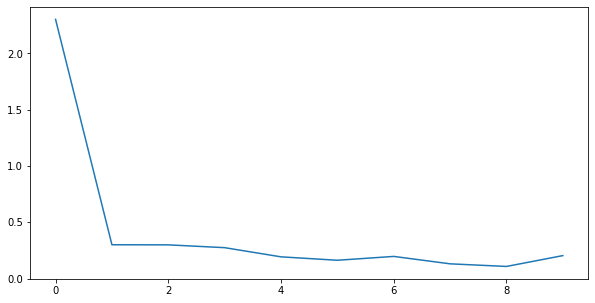

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(loss_arr)
plt.show()

## 6. Test

In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for image,label in test_loader:
      x = image.to(device)
      y_ = label.to(device)

      output = model.forward(x)
      _, output_index = torch.max(output, 1)

      total += label.size(0)
      correct += (output_index == y_).sum().float()

  print("Accuracy of Test Data: {}%".format(100 * correct / total))

Accuracy of Test Data: 96.21394348144531%
